XGBoost for Classification Problem Overiew in Python 3.x Pipeline:

1)-Import the libraries/modules needed
2)-Import data
3)-Data cleaning and pre-processing
4)-Train-test split
5)-XGBoost training and prediction
6)-Model Evaluation

Import the libraries/modules needed

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Import data

In [54]:

boston=pd.read_csv('G:/Work/HousingData.csv')

In [55]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [56]:
# column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#boston = pd.read_csv('G:/Work/housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [57]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [58]:
#Check of the data type
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [59]:
#Statistical info
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [60]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Data Cleaning

In [61]:
# Detect missing value
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [62]:
boston.isnull().sum().sum()

120

In [63]:
#Detect duplicate value
boston.duplicated().sum()

0

In [64]:
boston[boston.duplicated(keep=False)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [65]:
boston = boston.fillna(boston.mean())
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Good!! No duplicate and missing value. The data is ready to be used

In [66]:
boston.rename(columns={'MEDV':'PRICE'}, inplace = True)

In [67]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


Visualize the Target Variable: Plot a histogram of the target variable ('PRICE') to understand its distribution.

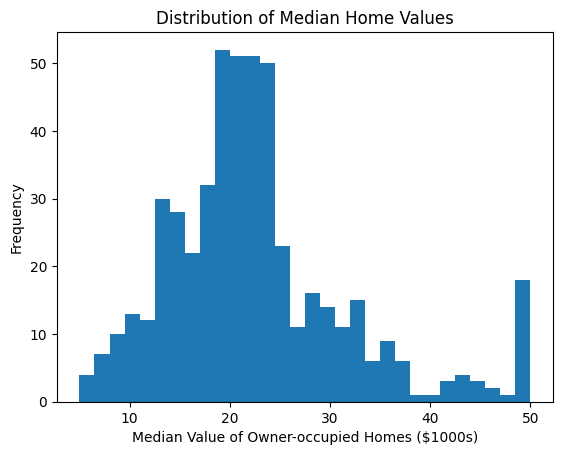

In [68]:
plt.hist(boston['PRICE'], bins=30)
plt.xlabel('Median Value of Owner-occupied Homes ($1000s)')
plt.ylabel('Frequency')
plt.title('Distribution of Median Home Values')
plt.show()


Explore Relationships: Explore relationships between features and the target variable using scatter plots or other visualization techniques.

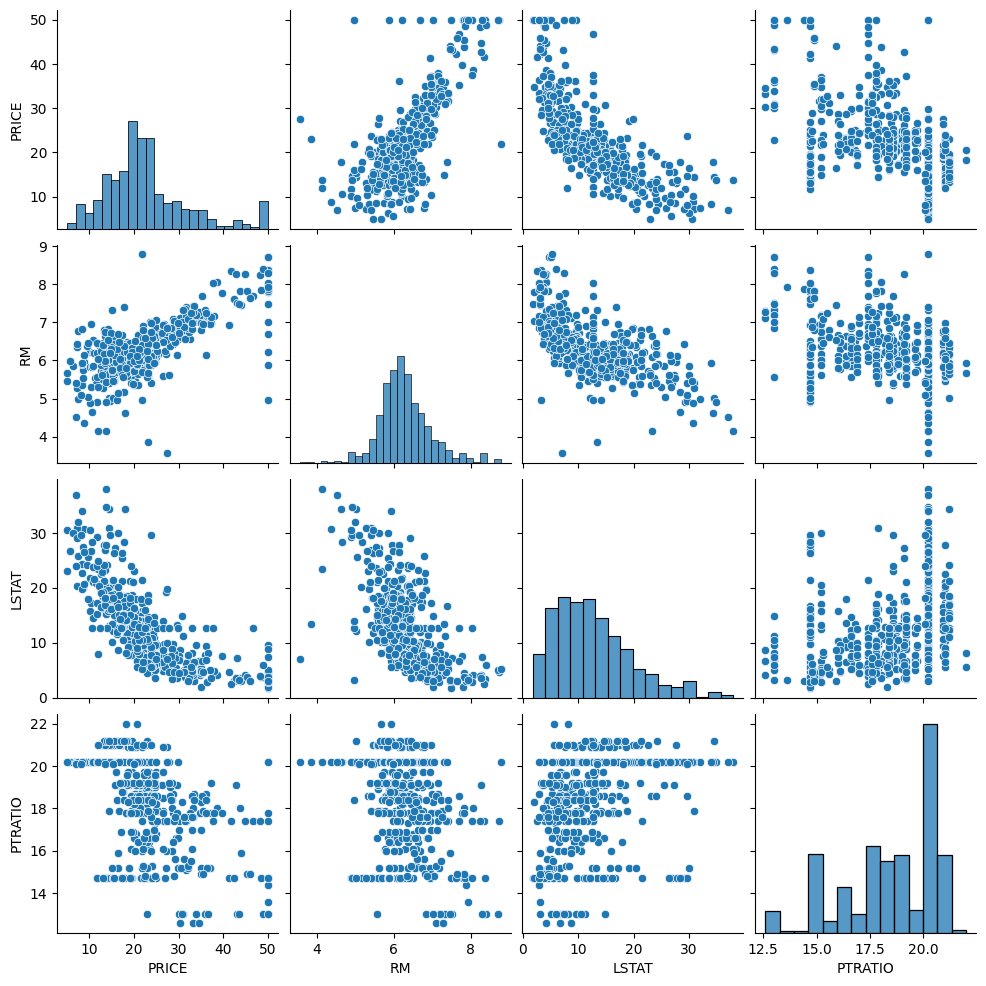

In [69]:
sns.pairplot(boston[['PRICE', 'RM', 'LSTAT', 'PTRATIO']])
plt.show()


Correlation Analysis: Calculate the correlation between features and the target variable, as well as among features, to understand their relationships.

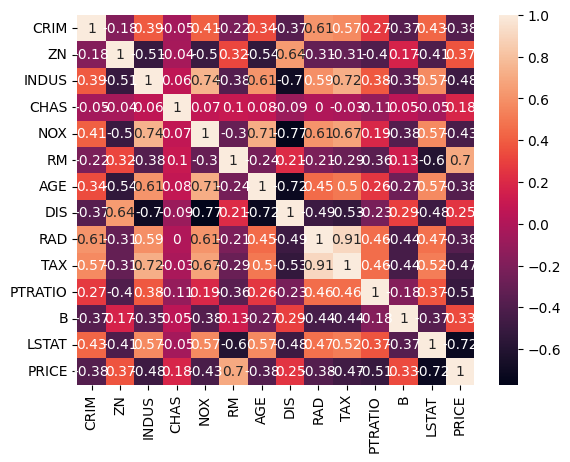

In [70]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Example: Create a new feature representing the ratio of rooms to bedrooms

In [71]:
boston['RM_to_BED'] = boston['RM'] / boston['B']

Outlier Detection:

 Create distribution plots (distplot) for each feature in the Boston Housing dataset. However, it's encountering an issue due to the non-numeric features in the dataset, which cannot be plotted using sns.distplot().

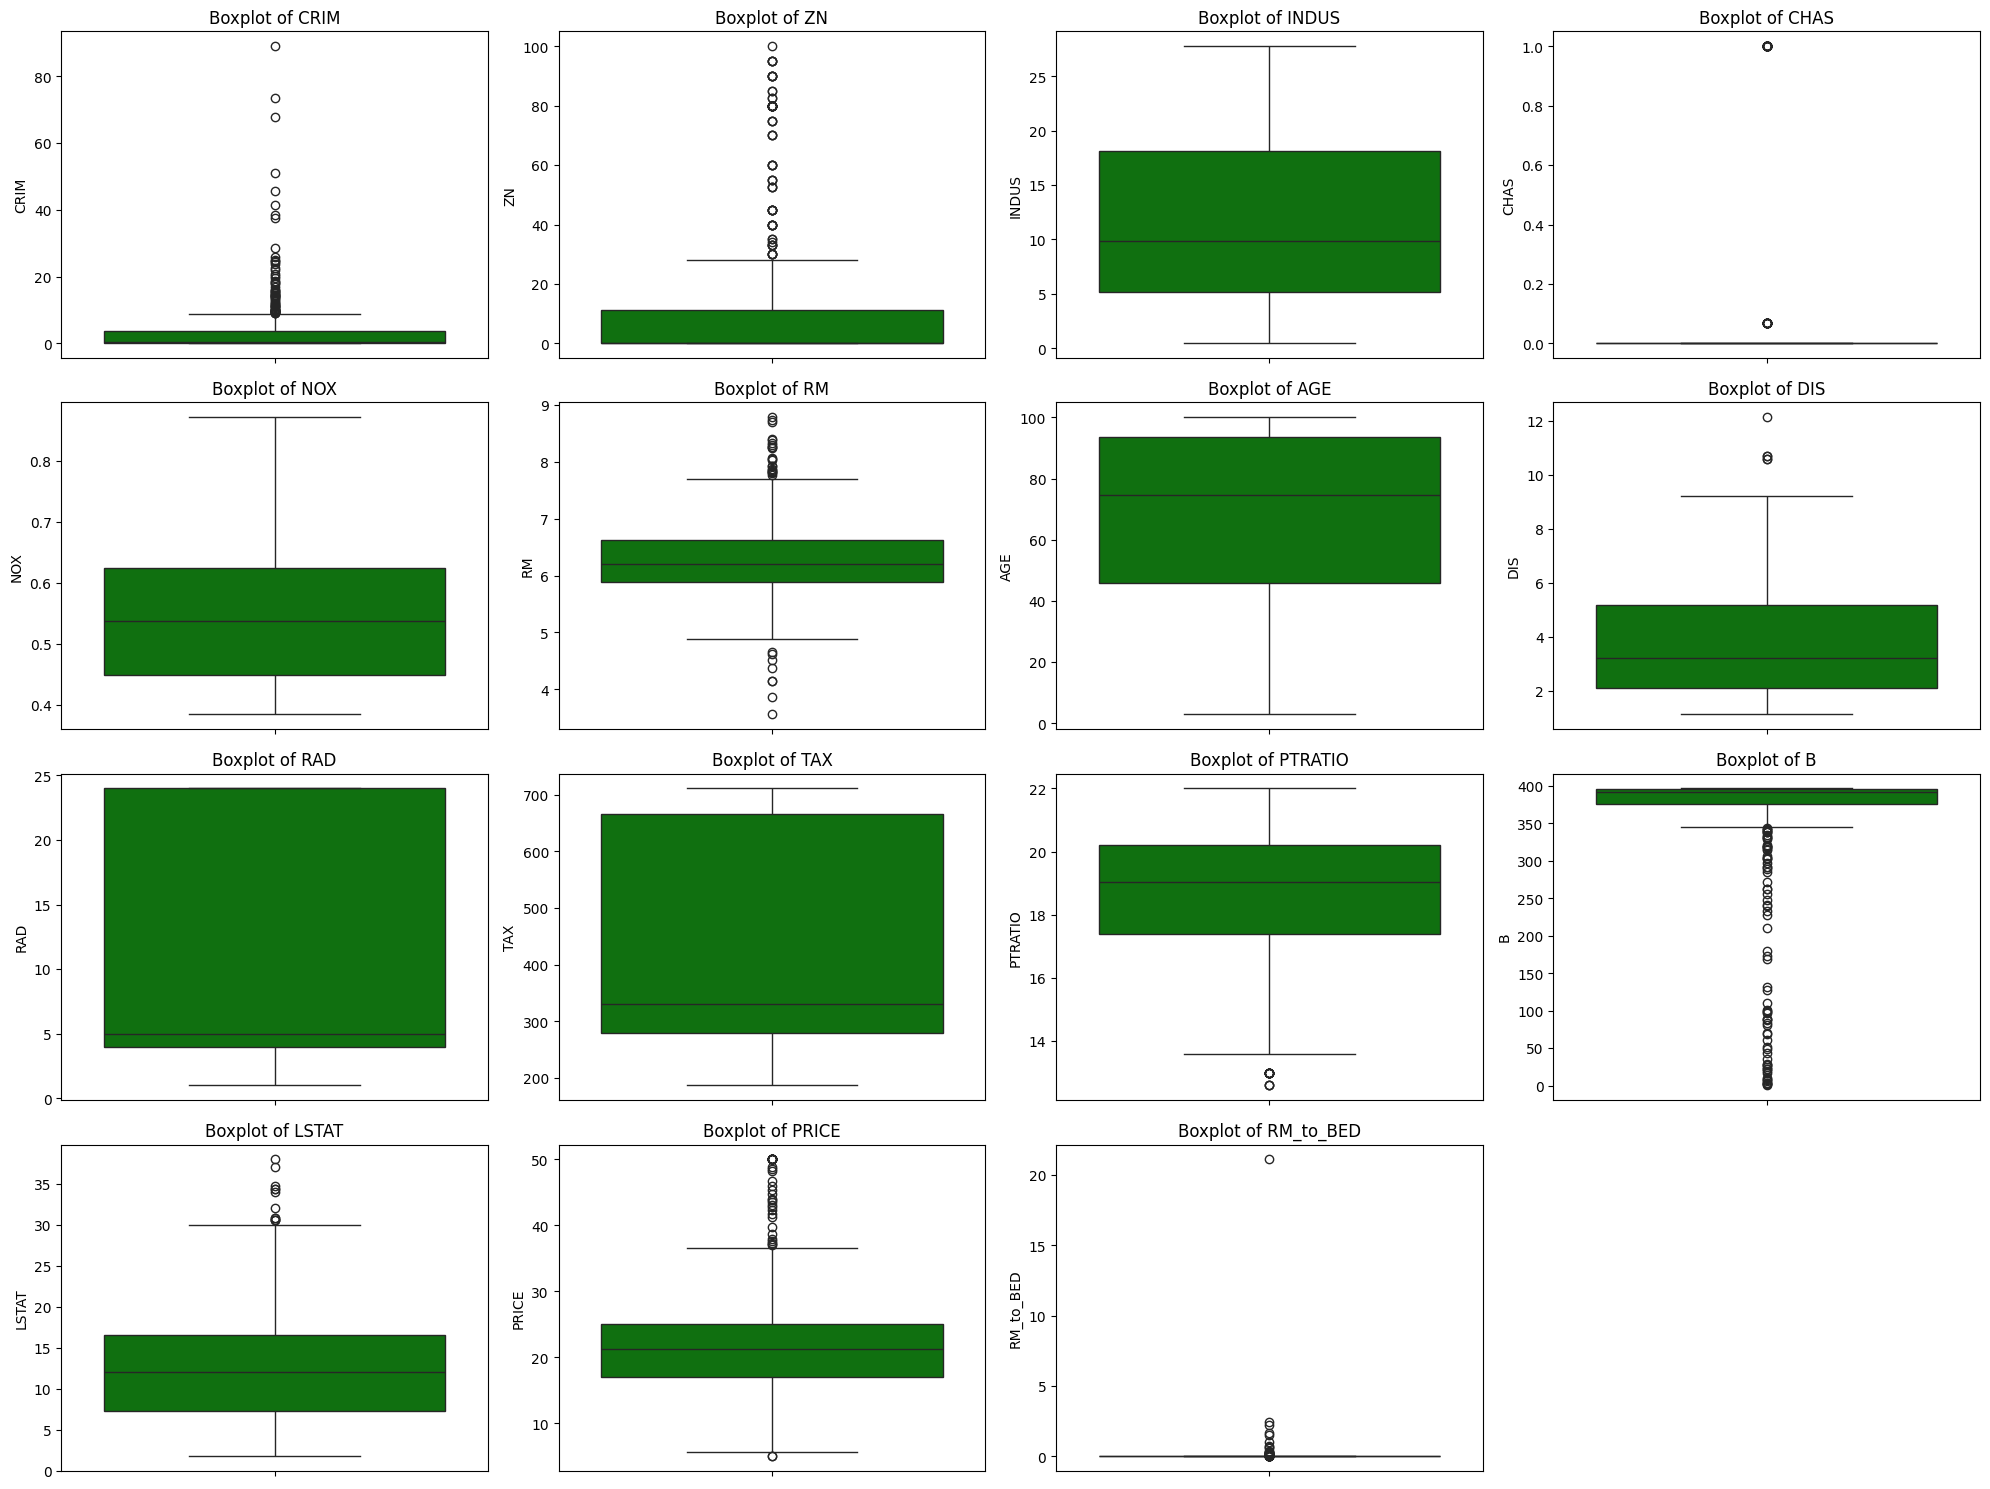

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numerical features
numerical_features = boston.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numerical feature
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
ax = ax.flatten()

# Loop through each numerical feature
for i, col in enumerate(numerical_features):
    sns.boxplot(y=boston[col], ax=ax[i], color='green')
    ax[i].set_title(f'Boxplot of {col}')

# Remove empty subplots
for i in range(len(numerical_features), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()


In [73]:
# Filter numerical features
numerical_features = boston.select_dtypes(include=['float64', 'int64']).columns

# Create distribution plots for each numerical feature
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
ax = ax.flatten()

# Loop through each numerical feature
for i, col in enumerate(numerical_features):
    sns.histplot(boston[col], color='green', ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')

# Remove empty subplots
for i in range(len(numerical_features), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

z_scores = stats.zscore(boston)
abs_z_scores = np.abs(z_scores)
outlier_indices = np.where(abs_z_scores > 3)
outliers = boston.iloc[outlier_indices]
print(outliers)

        ZN     ZN     ZN     ZN     ZN       B  LSTAT  CHAS  CHAS  CHAS  ...  \
55    90.0   90.0   90.0   90.0   90.0  395.93   4.81   0.0   0.0   0.0  ...   
56    85.0   85.0   85.0   85.0   85.0  396.90   5.77   0.0   0.0   0.0  ...   
57   100.0  100.0  100.0  100.0  100.0  392.90   3.95   0.0   0.0   0.0  ...   
65    80.0   80.0   80.0   80.0   80.0  396.90   4.67   0.0   0.0   0.0  ...   
66    80.0   80.0   80.0   80.0   80.0  396.90  10.24   0.0   0.0   0.0  ...   
..     ...    ...    ...    ...    ...     ...    ...   ...   ...   ...  ...   
454    0.0    0.0    0.0    0.0    0.0    6.68  18.71   0.0   0.0   0.0  ...   
455    0.0    0.0    0.0    0.0    0.0   50.92  18.13   0.0   0.0   0.0  ...   
456    0.0    0.0    0.0    0.0    0.0   10.48  19.01   0.0   0.0   0.0  ...   
457    0.0    0.0    0.0    0.0    0.0    3.50  16.94   0.0   0.0   0.0  ...   
466    0.0    0.0    0.0    0.0    0.0   22.01  17.15   0.0   0.0   0.0  ...   

          B  LSTAT       B       B  RM_

Min-Max Normalization

In [ ]:
cols = ['CRIM','ZN','TAX','B']
for col in cols:
  ##Find minimum and maximum of that column
  minimum = min(boston[col])
  maximum = max(boston[col])
  boston[col] = (boston[col]-minimum)/(maximum-minimum)

In [ ]:
# # Filter numerical features
# numerical_features = boston.select_dtypes(include=['float64', 'int64']).columns

# # Create distribution plots for each numerical feature
# fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
# ax = ax.flatten()

# # Loop through each numerical feature
# for i, col in enumerate(numerical_features):
#     sns.histplot(boston[col], color='green', ax=ax[i])
#     ax[i].set_title(f'Distribution of {col}')

# # Remove empty subplots
# for i in range(len(numerical_features), len(ax)):
#     fig.delaxes(ax[i])

# plt.tight_layout()
# plt.show()

Multivariate Analysis

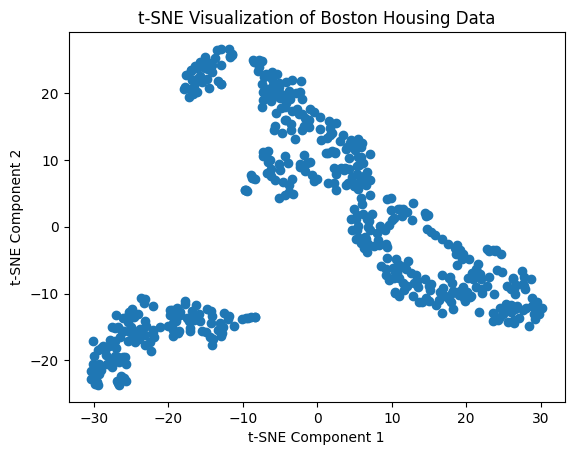

In [ ]:
# Example: Visualize high-dimensional data using t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(boston)
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.title('t-SNE Visualization of Boston Housing Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Distribution Visualization:

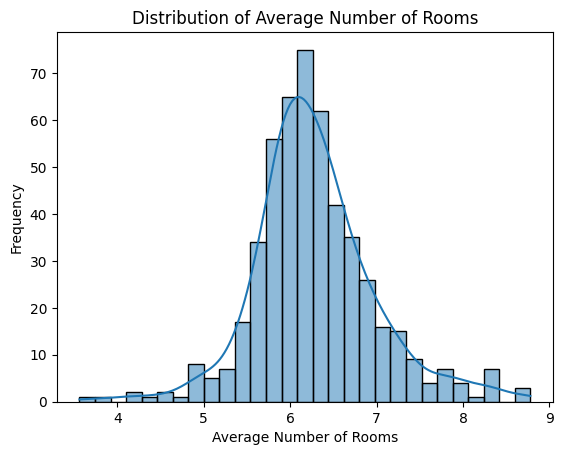

C:\Users\hp\AppData\Local\Temp\ipykernel_1020\1825264990.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(boston['LSTAT'], shade=True)


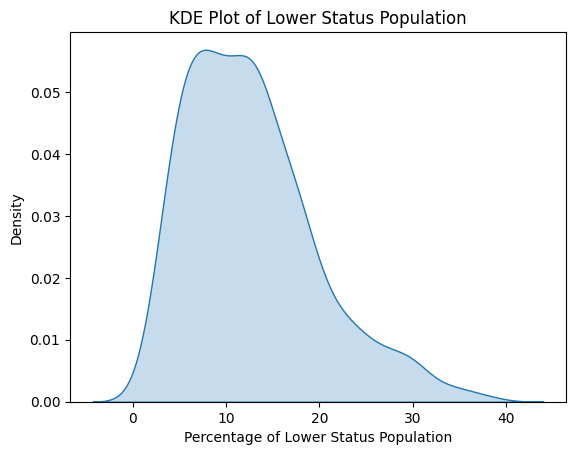

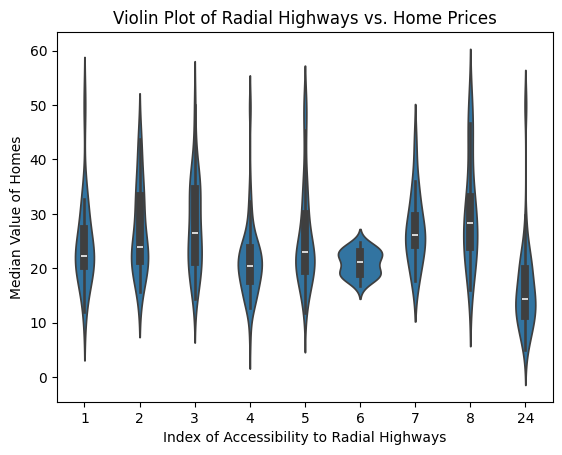

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of a numerical feature
sns.histplot(boston['RM'], kde=True)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Frequency')
plt.title('Distribution of Average Number of Rooms')
plt.show()

# KDE plot
sns.kdeplot(boston['LSTAT'], shade=True)
plt.xlabel('Percentage of Lower Status Population')
plt.ylabel('Density')
plt.title('KDE Plot of Lower Status Population')
plt.show()

# Violin plot
sns.violinplot(x=boston['RAD'], y=boston['PRICE'])
plt.xlabel('Index of Accessibility to Radial Highways')
plt.ylabel('Median Value of Homes')
plt.title('Violin Plot of Radial Highways vs. Home Prices')
plt.show()


In [ ]:
# Shapiro-Wilk test for normality
from scipy.stats import shapiro
stat, p = shapiro(boston['PRICE'])
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)
if p < 0.05:
    print('Data is not normally distributed')
else:
    print('Data is normally distributed')

# Pearson correlation test
from scipy.stats import pearsonr
corr, p_value = pearsonr(boston['RM'], boston['PRICE'])
print('Pearson correlation coefficient:', corr)
print('p-value:', p_value)
if p_value < 0.05:
    print('Correlation is statistically significant')
else:
    print('Correlation is not statistically significant')


Shapiro-Wilk test statistic: 0.9171758803890093
p-value: 4.941386258635722e-16
Data is not normally distributed
Pearson correlation coefficient: 0.6953599470715394
p-value: 2.487228871008081e-74
Correlation is statistically significant


Pairwise Relationships:

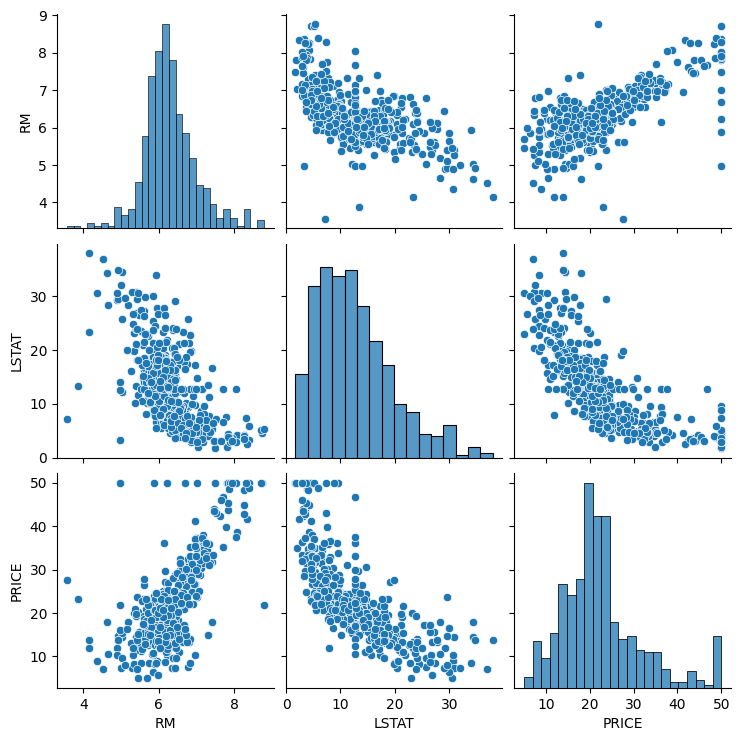

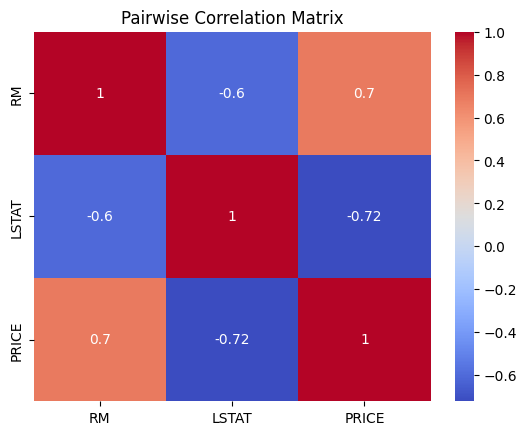

In [ ]:
# Pairplot
sns.pairplot(boston[['RM', 'LSTAT', 'PRICE']])
plt.show()

# Pairwise correlation matrix
correlation_matrix = boston[['RM', 'LSTAT', 'PRICE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Matrix')
plt.show()


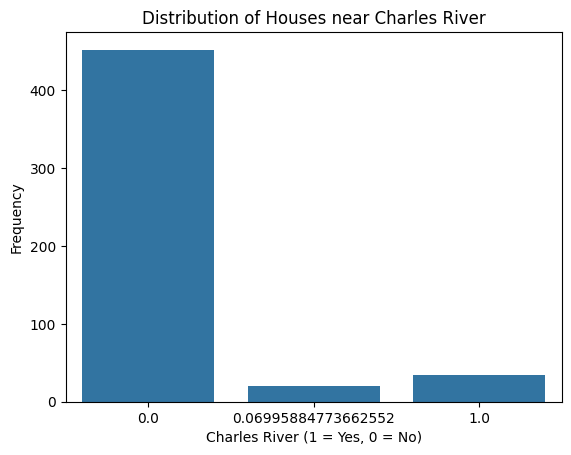

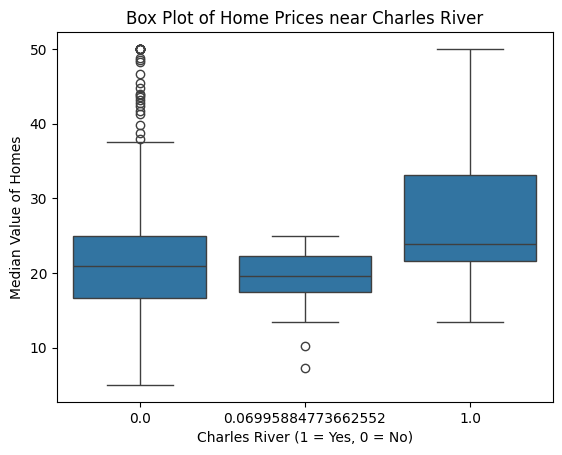

In [ ]:
# Bar plot of a categorical variable
sns.countplot(x=boston['CHAS'])
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Frequency')
plt.title('Distribution of Houses near Charles River')
plt.show()

# Box plot of a numerical variable grouped by a categorical variable
sns.boxplot(x=boston['CHAS'], y=boston['PRICE'])
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Median Value of Homes')
plt.title('Box Plot of Home Prices near Charles River')
plt.show()


Grouped Analysis:

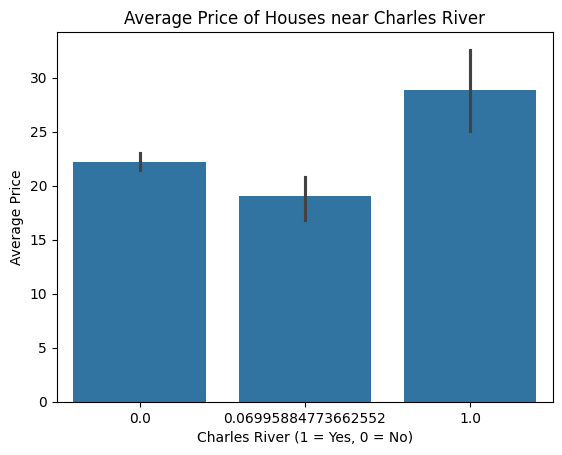

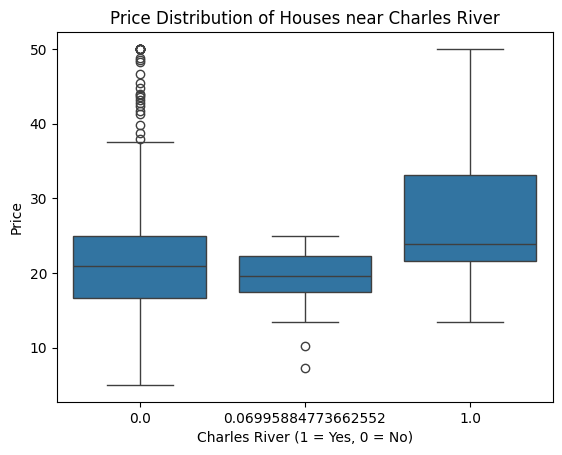

In [ ]:
# Grouped bar plot
sns.barplot(x='CHAS', y='PRICE', data=boston)
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Average Price')
plt.title('Average Price of Houses near Charles River')
plt.show()

# Grouped box plot
sns.boxplot(x='CHAS', y='PRICE', data=boston)
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Price')
plt.title('Price Distribution of Houses near Charles River')
plt.show()

Dimensionality Reduction

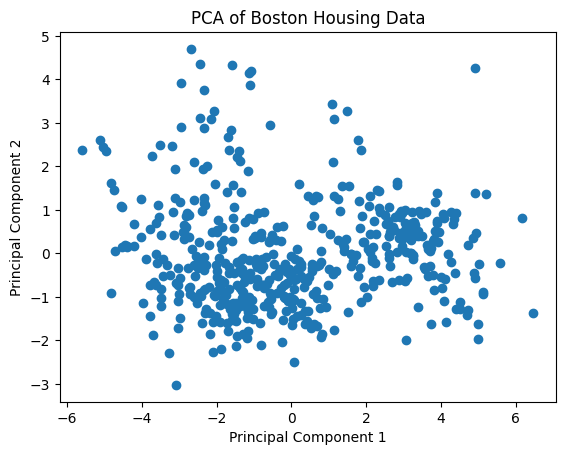

In [ ]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
boston_scaled = scaler.fit_transform(boston.drop('CHAS', axis=1))  # Drop non-numeric column if present
pca = PCA(n_components=2)
boston_pca = pca.fit_transform(boston_scaled)

# Plot PCA results
plt.scatter(boston_pca[:, 0], boston_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Boston Housing Data')
plt.show()


Time Series Analysis:

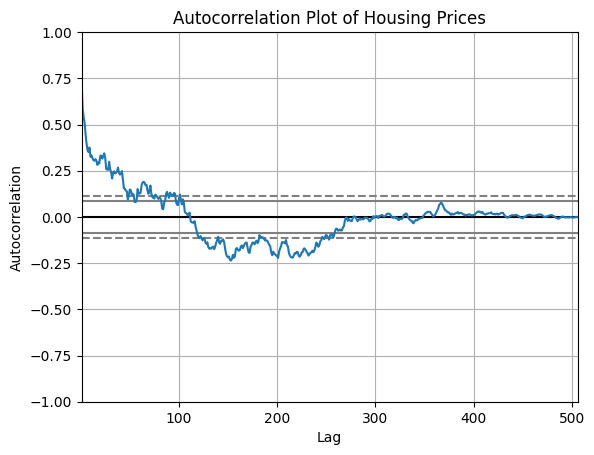

In [ ]:
# Autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(boston['PRICE'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot of Housing Prices')
plt.show()


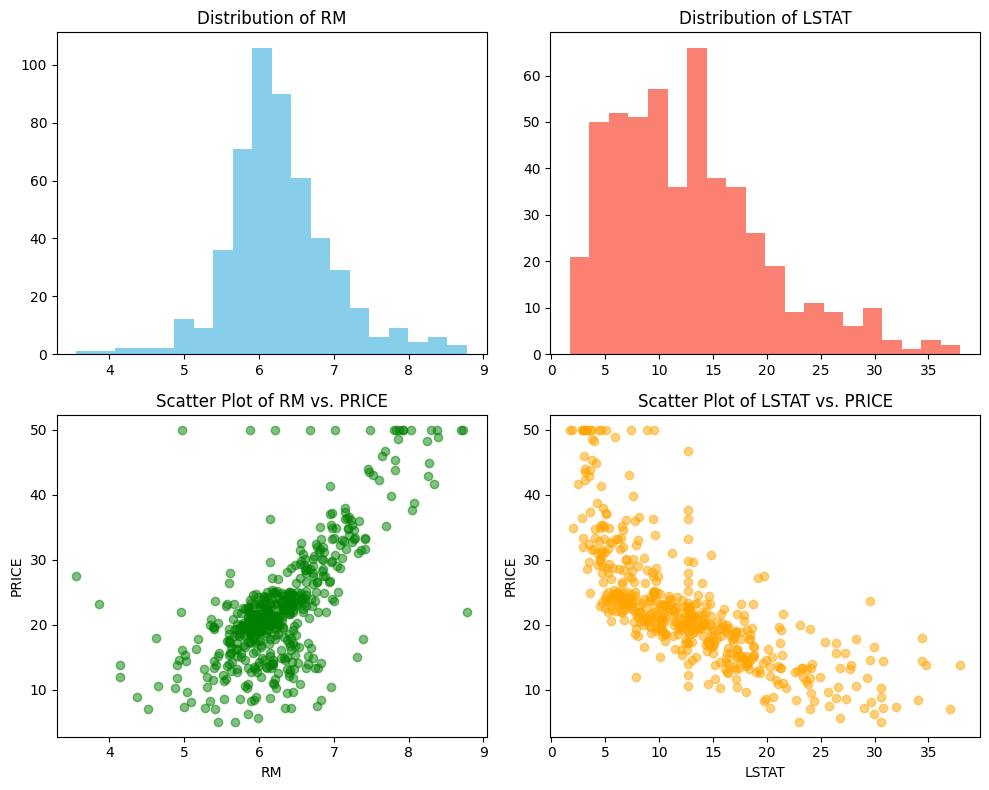

In [ ]:
# Create a series of plots as a storytelling sequence
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot 1: Distribution of RM
axes[0, 0].hist(boston['RM'], bins=20, color='skyblue')
axes[0, 0].set_title('Distribution of RM')

# Plot 2: Distribution of LSTAT
axes[0, 1].hist(boston['LSTAT'], bins=20, color='salmon')
axes[0, 1].set_title('Distribution of LSTAT')

# Plot 3: Scatter plot of RM vs. PRICE
axes[1, 0].scatter(boston['RM'], boston['PRICE'], color='green', alpha=0.5)
axes[1, 0].set_xlabel('RM')
axes[1, 0].set_ylabel('PRICE')
axes[1, 0].set_title('Scatter Plot of RM vs. PRICE')

# Plot 4: Scatter plot of LSTAT vs. PRICE
axes[1, 1].scatter(boston['LSTAT'], boston['PRICE'], color='orange', alpha=0.5)
axes[1, 1].set_xlabel('LSTAT')
axes[1, 1].set_ylabel('PRICE')
axes[1, 1].set_title('Scatter Plot of LSTAT vs. PRICE')

plt.tight_layout()
plt.show()

Split the data

In [ ]:
#Split the data into: train, validate, & test
#Split train test

from sklearn.model_selection import train_test_split

feature=boston.drop(columns='PRICE')
target=boston[['PRICE']]

feature_boston_train, feature_boston_test, target_boston_train, target_boston_test=train_test_split(feature,target,test_size=0.20,random_state=42)
     

Correlation Matrix

In [ ]:
#Calculate VIF scores  #optional
X= add_constant(feature_boston_train)

vif_df=pd.DataFrame([vif(X.values,i)
                for i in range (X.shape[1])],
                index=X.columns).reset_index()
vif_df.columns=['feature','vif_score']
vif_df=vif_df.loc[vif_df.feature!='constant']
vif_df

,feature,vif_score
0,const,568.111969
1,CRIM,1.643364
2,ZN,2.342556
3,INDUS,3.470008
4,CHAS,1.084135
5,NOX,4.250358
6,RM,1.865685
7,AGE,2.704757
8,DIS,4.116252
9,RAD,7.564589


There is feature with high VIF score:TAX

<function matplotlib.pyplot.show(close=None, block=None)>

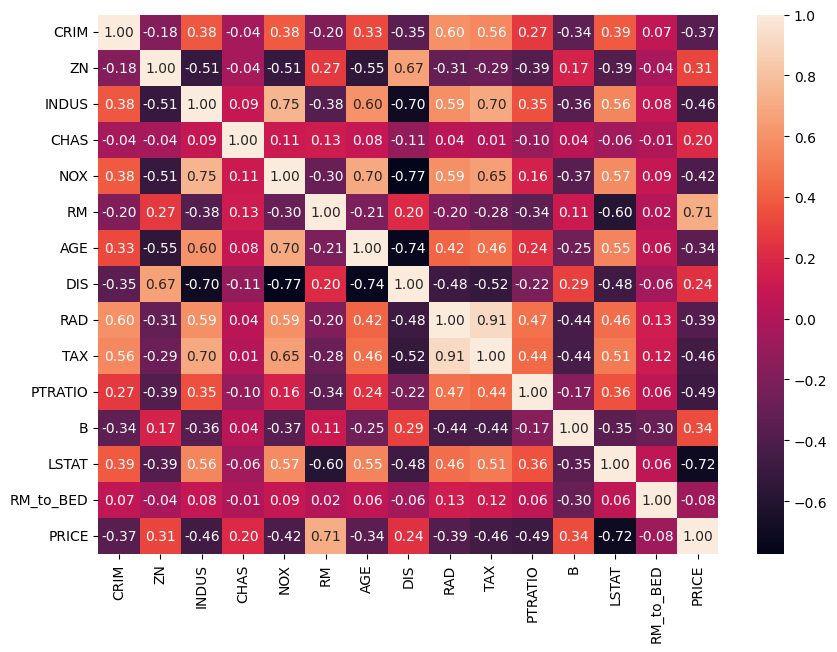

In [ ]:
#heatmap correlation
boston_train=pd.concat([feature_boston_train,target_boston_train],axis=1)
corr=boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show

Rows that have more than 0.8 of VIF scores should be retained 1 row and drop others.

In [ ]:
#drop redundant feature
feature_boston_train=feature_boston_train.drop(columns=['TAX'])
feature_boston_test=feature_boston_test.drop(columns=['TAX'])

In [ ]:
feature_boston_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,RM_to_BED
173,0.000961,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,16.6,0.996470,9.04,0.016223
274,0.000563,0.4,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,17.6,1.000000,3.53,0.017027
491,0.001117,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,20.1,0.982879,18.07,0.015337
72,0.000959,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4,19.2,0.984896,5.52,0.015515
452,0.057141,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24,20.2,0.970220,17.27,0.016352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.211360,0.0,18.100000,0.0,0.597,4.628,100.000000,1.5539,24,20.2,0.071789,34.37,0.160750
436,0.162015,0.0,18.100000,0.0,0.740,6.461,93.300000,2.0026,24,20.2,0.068511,18.05,0.235031
411,0.157855,0.0,18.100000,0.0,0.597,6.657,100.000000,1.5275,24,20.2,0.087574,21.22,0.189929
86,0.000512,0.0,4.490000,0.0,0.449,6.015,45.100000,4.4272,3,18.5,0.997705,12.86,0.015190


In [ ]:
#Recheck VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
X=add_constant(feature_boston_train)

vif_df=pd.DataFrame([vif(X.values,i)
              for i in range(X.shape[1])],
              index=X.columns).reset_index()

vif_df.columns=['feature','vif_score']
vif_df=vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.642928
2,ZN,2.166186
3,INDUS,2.979521
4,CHAS,1.073203
5,NOX,4.191509
6,RM,1.854202
7,AGE,2.704692
8,DIS,4.112363
9,RAD,2.806196
10,PTRATIO,1.828867


Good! Multicol issue already solved.

<Axes: xlabel='LSTAT', ylabel='PRICE'>

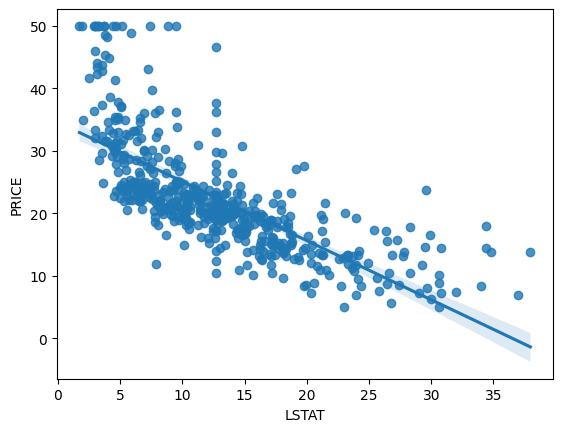

In [ ]:
#Regression plot
sns.regplot(y=boston['PRICE'], x=boston['LSTAT'])

<Axes: xlabel='RM', ylabel='PRICE'>

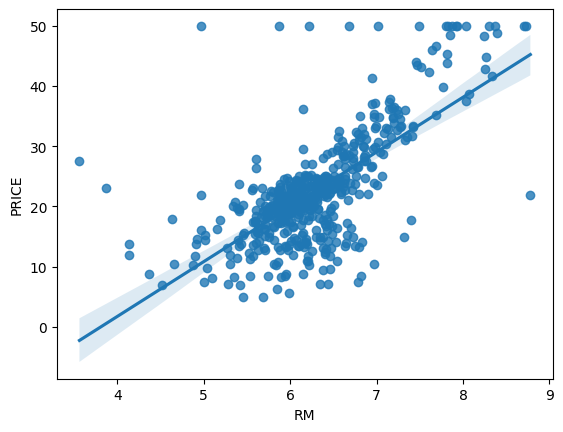

In [ ]:
sns.regplot(y=boston['PRICE'], x=boston['RM'])

Training Data

In [ ]:
def train(model,feature,target):
    #train the model
    feature_train, feature_test, target_train, target_test = train_test_split(feature, target, random_state=42)
    model.fit(feature_train, target_train)

    #predict the training set
    pred = model.predict(feature_test)

    #perform cross validation
    cv_score = cross_val_score (model, feature, target, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print('Model Report')
    print('MSE:' , mean_squared_error(target_test, pred))
    print('CV Score:' , cv_score)

Model Report
MSE: 7.76239050617285
CV Score: 25.2858845194078


<Axes: title={'center': 'Feature Importance'}>

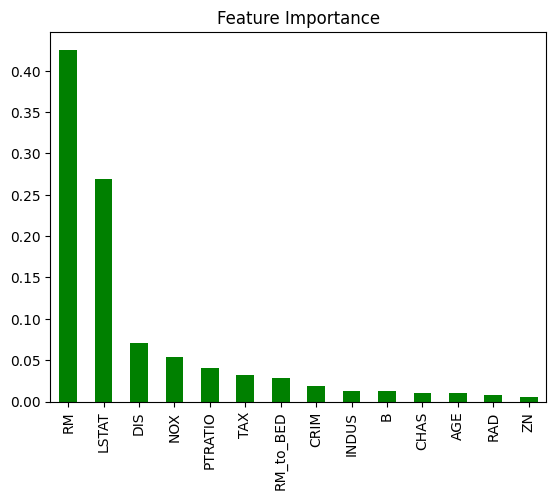

In [ ]:
#Training data for XGBoost Model
model = xgb.XGBRegressor()
train(model,feature,target)
coef = pd.Series(model.feature_importances_, feature.columns).sort_values(ascending=False)
coef.plot(kind='bar', color='green', title='Feature Importance')

Based on the graphic above, the most important features that effect on the house price in Boston are Lstat (% lower status of the population) which has more than 45% portion and rm (average number of rooms per dwelling) which has almost 30% portion.

In [ ]:
#Splitting to training and testing data
#Splitting to training and testing data

from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split (feature, target, test_size=0.20, random_state = 4)

XGBoost Regressor

In [ ]:
#Improt XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

#Train the model using the training sets
reg.fit(feature_train, target_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation

In [ ]:
#Model prediction on train data
target_pred=reg.predict(feature_train)

In [ ]:
print('R^2:',metrics.r2_score(target_train, target_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(target_train, target_pred))*(len(target_train)-1)/(len(target_train)-feature_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(target_train, target_pred))
print('MSE:',metrics.mean_absolute_percentage_error(target_train, target_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(target_train, target_pred)))

NameError: name 'metrics' is not defined

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(target_train, target_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(target_train, target_pred))*(len(target_train)-1)/(len(target_train)-feature_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(target_train, target_pred))
print('MAPE:',metrics.mean_absolute_percentage_error(target_train, target_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(target_train, target_pred)))

R^2: 0.9999971275096714
Adjusted R^2: 0.9999970241295567
MAE: 0.010655735742927832
MAPE: 0.0005486373293176924
RMSE: 0.01534822521475291


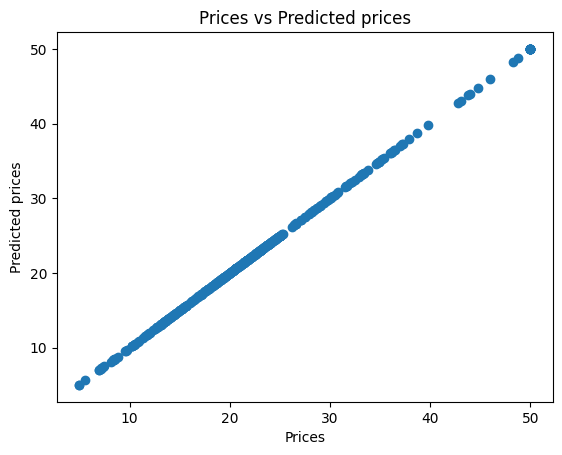

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(target_train, target_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

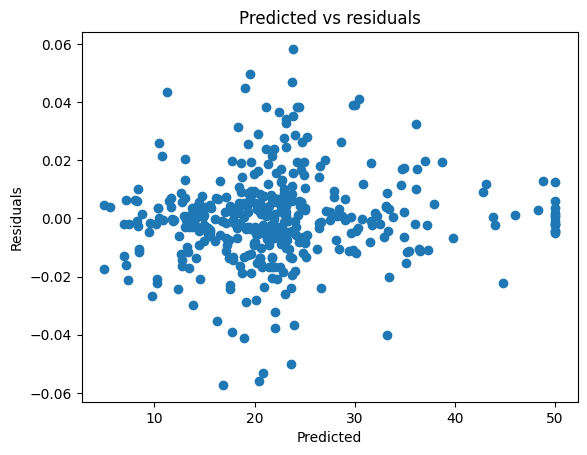

In [ ]:

# Extracting the specific column(s) if using DataFrame
if isinstance(target_pred, pd.DataFrame):
    target_pred = target_pred.squeeze()  # Convert DataFrame to Series
if isinstance(target_train, pd.DataFrame):
    target_train = target_train.squeeze()  # Convert DataFrame to Series

# Checking residuals
plt.scatter(target_pred, target_train - target_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:

##Fixing the error above
target_pred=target_pred.reshape(404,1)
     

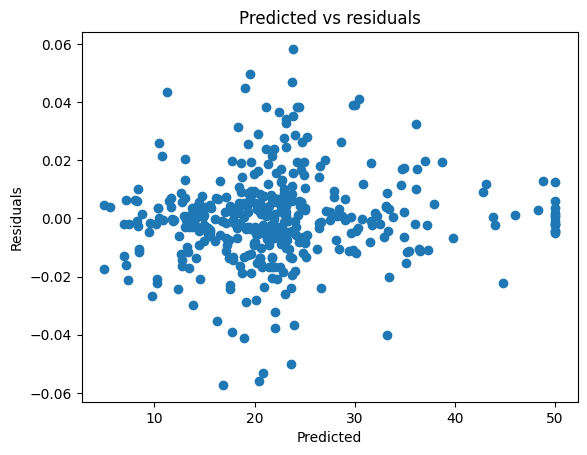

In [ ]:
# Convert target_pred and target_train to 1-dimensional arrays or Series
target_pred = target_pred.flatten() if isinstance(target_pred, np.ndarray) else target_pred
target_train = target_train.flatten() if isinstance(target_train, np.ndarray) else target_train

# Checking residuals
plt.scatter(target_pred, target_train - target_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


In [ ]:

#Predicting Test data with the model
target_test_pred = reg.predict(feature_test)

In [ ]:
# Model Evaluation
acc_xgb = metrics.r2_score(target_test, target_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(target_test, target_test_pred))*(len(target_test)-1)/(len(target_test)-feature_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(target_test, target_test_pred))
print('MAPE:',metrics.mean_absolute_percentage_error(target_test, target_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(target_test, target_test_pred)))

R^2: 0.8020753421786185
Adjusted R^2: 0.7702253972418445
MAE: 2.3511528389126646
MAPE: 0.10645607393371097
RMSE: 4.287781237674492


Model evaluation:-
MAPE = 0.10365569853758658 = 10.64%

Based on the MAPE, the model is acceptable.

R^2 = 0.8020753421786185 = 82.23%

Based on the R^2, features explains the model 82.23%, while the rest is explained by others features outside the model.

Tune different hyperparameters and compare the results (train and test)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(boston.drop('PRICE', axis=1), boston['PRICE'], test_size=0.2, random_state=42)

In [ ]:
# Function to train XGBoost model and return RMSE
def train_xgboost(params, X_train, y_train, X_test, y_test, early_stopping_rounds=None):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    evals = [(dtrain, 'train'), (dtest, 'test')]
    
    if early_stopping_rounds:
        model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
    else:
        model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, verbose_eval=False)
    
    y_pred_train = model.predict(dtrain)
    y_pred_test = model.predict(dtest)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    return rmse_train, rmse_test


# Fit XGBoost model and tune hyperparameters

In [ ]:
params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 500,
    'objective': 'reg:squarederror',
    'seed': 42
}

In [ ]:
print("Before tuning:")
rmse_train, rmse_test = train_xgboost(params, X_train, y_train, X_test, y_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Before tuning:


g:\Work\XGBoostProblem\venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:43:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Train RMSE: 0.095203747965417
Test RMSE: 2.4633724615718315


In [ ]:
# Corrected parameter grid with 'n_estimators' instead of 'num_boost_round'
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

best_rmse = float('inf')
best_params = None

for max_depth in param_grid['max_depth']:
    for learning_rate in param_grid['learning_rate']:
        for n_estimators in param_grid['n_estimators']:
            # Create a new params dictionary for each iteration
            params = {
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'objective': 'reg:squarederror',  # Specify the objective
                'random_state': 42  # Specify the random state for reproducibility
            }
            
            # Train XGBoost model and evaluate
            xgb_model = xgb.XGBRegressor(**params)
            xgb_model.fit(X_train, y_train)
            y_pred_test = xgb_model.predict(X_test)
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            
            # Update best RMSE and parameters if necessary
            if rmse_test < best_rmse:
                best_rmse = rmse_test
                best_params = params

print("\nAfter tuning:")
print("Best parameters:", best_params)
print("Best Test RMSE:", best_rmse)



After tuning:
Best parameters: {'max_depth': 3, 'learning_rate': 0.2, 'n_estimators': 200, 'objective': 'reg:squarederror', 'random_state': 42}
Best Test RMSE: 2.4037491207385657


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7,9],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'n_estimators': [50, 100, 200,300]
}

# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Use the best parameters to train the final model
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
best_xgb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_test = best_xgb_model.predict(X_test)

# Evaluate the model
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE with best parameters:", test_rmse)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Test RMSE with best parameters: 2.5874911442572177


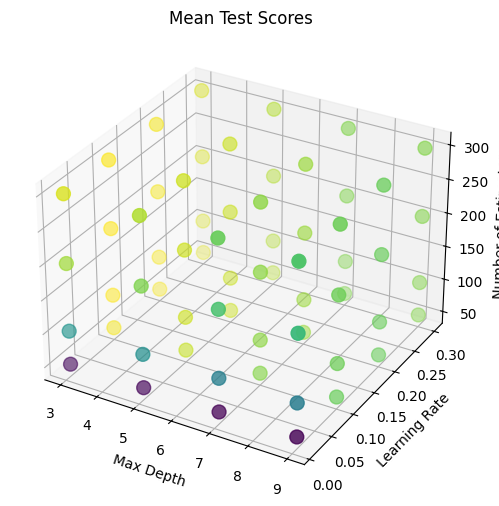

Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Test RMSE with best parameters: 2.5874911442572177


In [ ]:

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the results of GridSearchCV
results = grid_search.cv_results_

# Extract mean test scores and hyperparameters
mean_test_scores = results['mean_test_score']
params = results['params']

# Extract the values of each hyperparameter for plotting
max_depth_values = [param['max_depth'] for param in params]
learning_rate_values = [param['learning_rate'] for param in params]
n_estimators_values = [param['n_estimators'] for param in params]

# Plotting
fig = plt.figure(figsize=(12, 6))

# Plot the mean test scores
ax = fig.add_subplot(111, projection='3d')
ax.scatter(max_depth_values, learning_rate_values, n_estimators_values, c=mean_test_scores, cmap='viridis', s=100)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Number of Estimators')
ax.set_title('Mean Test Scores')

plt.show()

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Use the best parameters to train the final model
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
best_xgb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_test = best_xgb_model.predict(X_test)

# Evaluate the model
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE with best parameters:", test_rmse)


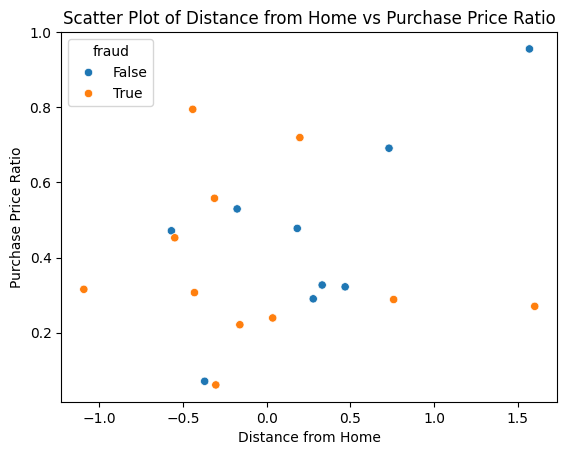

In [ ]:
# Creating a sample dataframe
data = {
    'dist_from_home': np.random.normal(0, 1, 20),  # Generating 1000 random values with mean 0 and std dev 1
    'purchase_price_ratio': np.random.uniform(0, 1, 20),  # Generating 1000 random values between 0 and 1
    'fraud': np.random.choice([True, False], 20)  # Generating 1000 random True/False values
}

df = pd.DataFrame(data)

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['dist_from_home'], y=df['purchase_price_ratio'], hue=df['fraud'])
plt.xlabel('Distance from Home')
plt.ylabel('Purchase Price Ratio')
plt.title('Scatter Plot of Distance from Home vs Purchase Price Ratio')
plt.show()


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('fraud', axis=1)
y = df['fraud']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,dist_from_home,purchase_price_ratio
9,0.758803,0.288287
14,-0.549974,0.452671
0,0.198064,0.719358
19,-1.093683,0.315405
10,0.468787,0.322036
4,-0.177073,0.529463
2,0.182439,0.477599
11,0.731104,0.691061
15,-0.432164,0.306707
18,-0.304539,0.060946


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.80596658, -0.64652555],
       [-1.03260019,  0.05930328],
       [ 0.0182423 ,  1.20439912],
       [-1.79640047, -0.53008835],
       [ 0.39855336, -0.50161552],
       [-0.50874927,  0.38902853],
       [-0.0037074 ,  0.16633843],
       [ 0.76705479,  1.08289632],
       [-0.86710111, -0.56743281],
       [-0.68781334, -1.6226777 ],
       [-0.48579313, -0.93459   ],
       [ 1.99099814, -0.72458433],
       [ 0.20559716, -0.48079414],
       [-0.88144812,  1.52736668],
       [ 1.94664425,  2.21768342],
       [ 0.13055647, -0.63870738]])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0
